# Regression Week 3: Polynomial Regression Quiz

In this notebook you will compare different regression models in order to assess which model fits best. We will be using polynomial regression as a means to examine this topic. In particular you will:

- Write a function to take an an array and a degree and return an data frame where each column is the array to a polynomial value up to the total degree.
- Use a plotting tool (e.g. matplotlib) to visualize polynomial regressions
- Use a plotting tool (e.g. matplotlib) to visualize the same polynomial degree on different subsets of the data
- Use a validation set to select a polynomial degree
- Assess the final fit using test data



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
dtype_dict = {
    'bathrooms':float, 
    'waterfront':int, 
    'sqft_above':int, 
    'sqft_living15':float, 
    'grade':int, 
    'yr_renovated':int, 
    'price':float, 
    'bedrooms':float, 
    'zipcode':str, 
    'long':float,
    'sqft_lot15':float,
    'sqft_living':float,
    'floors':str,
    'condition':int,
    'lat':float,
    'date':str,
    'sqft_basement':int,
    'yr_built':int,
    'id':str,
    'sqft_lot':int,
    'view':int
}

sales = pd.read_csv('../kc_house_data.csv', dtype=dtype_dict)
sales = sales.sort_values(['sqft_living','price'])

Write your own function called ‘polynomial_dframe’ (or otherwise) which accepts an array ‘feature’ and a maximal ‘degree’ and returns a data frame with the first column equal to ‘feature’ and the remaining columns equal to ‘feature’ to increasing integer powers up to ‘degree’.



In [3]:
def polynomial(feature, degree):
    poly_dframe = pd.DataFrame({ 'power_1': feature})

    for power in range(2, degree+1):
        poly_dframe['power_' + str(power)] = poly_dframe['power_1'].apply(lambda x: x**power)
            
    return poly_dframe

In [4]:
poly1_data = polynomial(sales['sqft_living'], 1)
poly1_data['price'] = sales['price']
poly1_data.head()

,power_1,price
19452,290.0,142000.0
15381,370.0,276000.0
860,380.0,245000.0
18379,384.0,265000.0
4868,390.0,228000.0


Use graphlab.linear_regression.create (or another linear regression library) to compute the regression weights for predicting sales[‘price’] based on the 1 degree polynomial feature ‘sqft_living’. The result should be an intercept and slope.

In [5]:
from sklearn import linear_model
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

class LinearModel:
    
    def __init__(self, data, target, features):        
        self.features = features
        self.target = target
        
        H = self.getFeatures(data)
        y = pd.Series(data[target])
        
        self.model = linear_model.LinearRegression()
        self.model.fit(H,y)

    def getFeatures(self, data):
        H = pd.DataFrame(data, columns=self.features)

        return np.array(H)
    
    def predict(self, data):
        return self.model.predict(self.getFeatures(data))
        
    def weights(self):
        return np.array([self.model.intercept_] + self.model.coef_.tolist())

In [6]:
linearModel = LinearModel(poly1_data, target='price', features=[x for x in poly1_data.columns.values if not x == 'price'])
linearModel.weights()

array([-43580.74309448,    280.6235679 ])

Next use the produce a scatter plot of the training data (just square feet vs price) and add the fitted model. e.g. with matplotlib and SFrames:

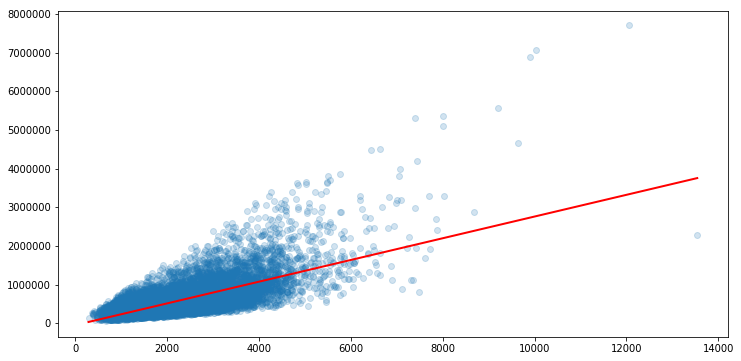

In [7]:
fig, ax = plt.subplots(figsize=(12,6))

ax.scatter(x='sqft_living', y='price', data=sales, alpha=0.2)
ax.plot(poly1_data['power_1'], linearModel.predict(poly1_data), color='red', linewidth=2)

plt.show()

Now that you have plotted the results using a 1st degree polynomial, try it again using a 2nd degree and 3rd degree polynomial. Look at the fitted lines, do they appear as you would expect?

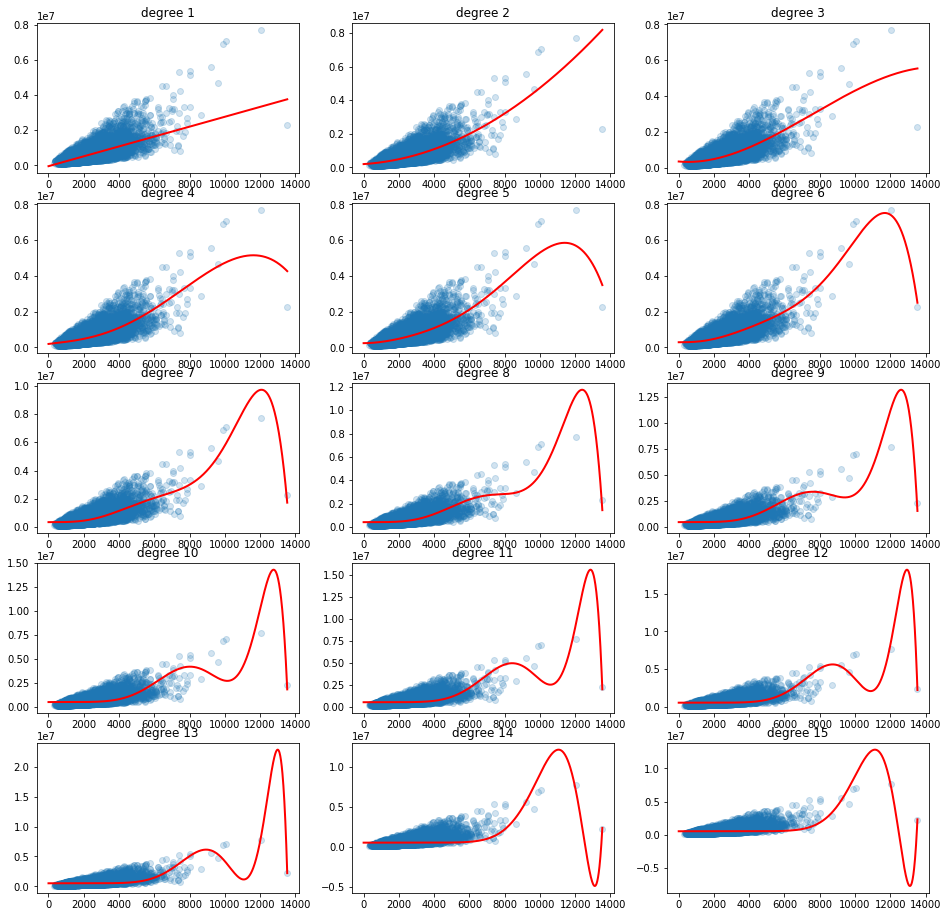

In [8]:
n = 15

polyN = polynomial(sales['sqft_living'], 15)
polyN['price'] = sales['price']

lin = pd.DataFrame({'sqft_living': np.linspace(1,sales['sqft_living'].max(),1000)})
polyLin = polynomial(lin['sqft_living'], 15)
    
fig, ax = plt.subplots(ncols=3, nrows=((n - 1) // 3) + 1, figsize=(16,16))

for i in range(n):
    model = LinearModel(polyN, target='price', features=['power_' + str(x + 1) for x in range(i + 1)])

    row = ax[i // 3] if n > 3 else ax

    row[i % 3].scatter(x='sqft_living', y='price', data=sales, alpha=0.2)
    row[i % 3].plot(polyLin['power_1'], model.predict(polyLin), color='red', linewidth=2)
    row[i % 3].set_title('degree ' + str(i + 1))

plt.show()

Now try a 15th degree polynomial. Print out the coefficients and look at the resulted fitted line. Do you think this degree is appropriate for these data? If we were to use a different subset of the data do you think we would get pretty much the same curve?

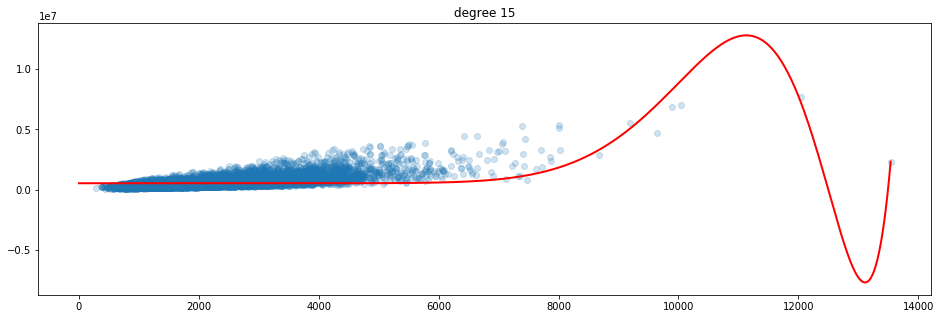

In [9]:
model = LinearModel(polyN, target='price', features=['power_' + str(x + 1) for x in range(15)])

fig, ax = plt.subplots(figsize=(16,5))

ax.scatter(x='sqft_living', y='price', data=sales, alpha=0.2)
ax.plot(polyLin['power_1'], model.predict(polyLin), color='red', linewidth=2)
ax.set_title('degree 15')

plt.show()

f you’re using SFrames then create four subsets as follows:

first split sales into 2 subsets with .random_split(.5) use seed = 0!
next split these into 2 more subsets (4 total) using random_split(0.5) again set seed = 0!
you should have 4 subsets of (approximately) equal size, call them set_1, set_2, set_3, and set_4
If you’re not using SFrames then please download the provided csv files for each subset.

Estimate a 15th degree polynomial on all 4 sets, plot the results and view the coefficients for all four models.

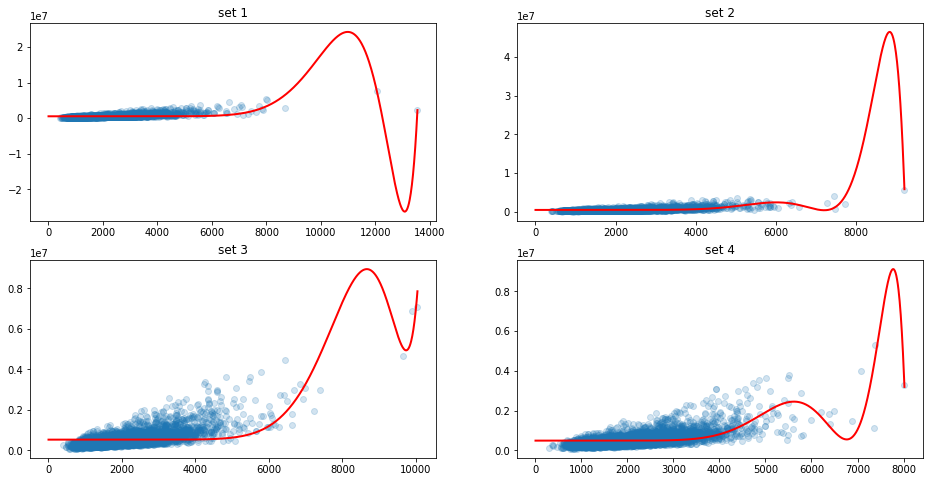

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
1,539058.818668,3.057942e-90,2.996187e-49,-1.413753e-55,1.321897e-59,2.732868e-74,1.103583e-70,8.377240e-67,6.234120e-63,4.491564e-59,3.069388e-55,1.917493e-51,1.013352e-47,3.621770e-44,-5.635017e-48,2.186411e-52
2,506771.947696,2.713359e-77,7.335437e-39,8.999529e-45,-2.422464e-49,2.341538e-53,-3.784005e-57,3.645495e-55,1.504162e-51,5.760156e-48,1.957705e-44,5.393965e-41,9.403763e-38,-3.635291e-41,4.654765e-45,-1.971978e-49
3,530874.316653,2.837519e-88,5.402162e-49,9.234416e-55,2.602509e-59,1.904941e-72,4.278949e-69,2.680096e-65,1.639114e-61,9.664350e-58,5.380447e-54,2.725636e-50,1.162532e-46,3.337561e-43,-6.762388e-47,3.431329e-51
4,494792.301442,1.371160e-76,2.796079e-40,-2.127967e-44,-7.561959e-50,1.214879e-53,9.037717e-58,1.270700e-54,4.878690e-51,1.735490e-47,5.470583e-44,1.395876e-40,2.250419e-37,-9.439541e-41,1.315731e-44,-6.091615e-49


In [10]:
set_1 = pd.read_csv('wk3_kc_house_set_1_data.csv', dtype=dtype_dict)
set_2 = pd.read_csv('wk3_kc_house_set_2_data.csv', dtype=dtype_dict)
set_3 = pd.read_csv('wk3_kc_house_set_3_data.csv', dtype=dtype_dict)
set_4 = pd.read_csv('wk3_kc_house_set_4_data.csv', dtype=dtype_dict)


fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(16,8))

weights = {}

for i, setN in enumerate([set_1, set_2, set_3, set_4]):
    polyN = polynomial(setN['sqft_living'], 15)
    polyN['price'] = setN['price']
    
    model = LinearModel(polyN, target='price', features=['power_' + str(x + 1) for x in range(15)])
    weights[i+1] = model.weights()
    
    ax = axes[i // 2][i % 2]
    
    ax.scatter(x='sqft_living', y='price', data=setN, alpha=0.2)
    
    lin = pd.DataFrame({'sqft_living': np.linspace(1,setN['sqft_living'].max(),1000)})
    polyLin = polynomial(lin['sqft_living'], 15)
    ax.plot(polyLin['power_1'], model.predict(polyLin), color='red', linewidth=2)
    ax.set_title('set ' + str(i + 1))

plt.show()

pd.DataFrame(weights).T

Since the “best” polynomial degree is unknown to us we will use cross validation to select the best degree. If you’re using SFrames then create a training, validation and testing subsets as follows:

First split sales into training_and_validation and testing with sales.random_split(0.9) use seed = 1!
Next split training_and_validation into training and validation using .random_split(0.5) use seed = 1!
If you’re not using SFrames then please download the provided csv files for training, validation and test data.

Now for each degree from 1 to 15:

Build an polynomial data set using training_data[‘sqft_living’] as the feature and the current degree
Add training_data[‘price’] as a column to your polynomial data set
Learn a model on TRAINING data to predict ‘price’ based on your polynomial data set at the current degree
Compute the RSS on VALIDATION for the current model (print or save the RSS)


Quiz Question: Which degree (1, 2, …, 15) had the lowest RSS on Validation data?

Now that you have selected a degree compute the RSS on TEST data for the model with the best degree from the Validation data.

Quiz Question: what is the RSS on TEST data for the model with the degree selected from Validation data? (Make sure you got the correct degree from the previous question)

In [11]:
test = pd.read_csv('wk3_kc_house_test_data.csv', dtype=dtype_dict)
train = pd.read_csv('wk3_kc_house_train_data.csv', dtype=dtype_dict)
validation = pd.read_csv('wk3_kc_house_valid_data.csv', dtype=dtype_dict)

In [12]:
rss = lambda y, y_hat: np.dot((y - y_hat).T, (y - y_hat))

poly_n_train = polynomial(train['sqft_living'], 15)
poly_n_train['price'] = train['price']
                              
poly_n_validation = polynomial(validation['sqft_living'], 15)
poly_n_test = polynomial(test['sqft_living'], 15)


weights = []
                              
for i in range(15):
    model = LinearModel(poly_n_train, target='price', features=['power_' + str(x + 1) for x in range(i + 1)])                       
    weights.append(model.weights())
    
    y_hat_valid = model.predict(poly_n_validation)
    y_hat_test = model.predict(poly_n_test)

    print(i + 1, rss(validation['price'], y_hat_valid), rss(test['price'], y_hat_test))


1 6.290978863e+14 1.42347931359e+14
2 6.23955062707e+14 1.35542039274e+14
3 6.25820280252e+14 1.35585996079e+14
4 6.29987339076e+14 1.35382681451e+14
5 6.28238341361e+14 1.3549595056e+14
6 5.66268588322e+14 1.35225114558e+14
7 1.07383902344e+15 1.33047330193e+14
8 7.08786221258e+15 1.3487385871e+14
9 4.52994509219e+16 1.45663072208e+14
10 2.47574166175e+17 1.63697567687e+14
11 1.19419022213e+18 1.84483449239e+14
12 5.25111180404e+18 2.04248132235e+14
13 7.6162300213e+17 2.69960927585e+14
14 2.29756092501e+18 2.74049430547e+14
15 6.95503809877e+18 2.76693705524e+14
